### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [3]:
# Import all necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [4]:
# Load the data set.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Check for missing values?
reviews.isna().any()

gender                    False
age                       False
remuneration (k£)         False
spending_score (1-100)    False
loyalty_points            False
education                 False
language                  False
platform                  False
product                   False
review                    False
summary                   False
dtype: bool

In [6]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [8]:
# Drop unnecessary columns.
reviews = reviews.drop(['language','platform'], axis=1)

In [9]:
# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [10]:
# Rename the column headers.
reviews.rename(columns = {'remuneration (k£)':'renumeration',
                          'spending_score (1-100)':'spending_score'}, 
               inplace=True)

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
reviews.to_csv('reviews_clean.csv', index=False)

In [12]:
# Import new CSV file with Pandas.
df =  pd.read_csv('reviews_clean.csv')

# View DataFrame.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

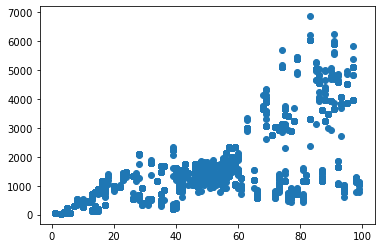

In [14]:
# Define the dependent variable.
y = df['loyalty_points']  

# Define the independent variable.
x = df['spending_score'] 

plt.scatter(x,y)

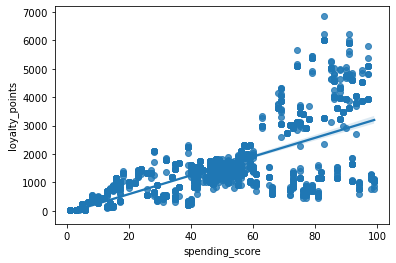

In [13]:
# Plot the graph with a regression line.
sns.regplot(x='spending_score', y='loyalty_points', data=df)

# View the plot.
plt.show()

(array([444., 724., 432.,  55., 103., 116.,  51.,  52.,  20.,   3.]),
 array([  25. ,  707.2, 1389.4, 2071.6, 2753.8, 3436. , 4118.2, 4800.4,
        5482.6, 6164.8, 6847. ]),
 <BarContainer object of 10 artists>)

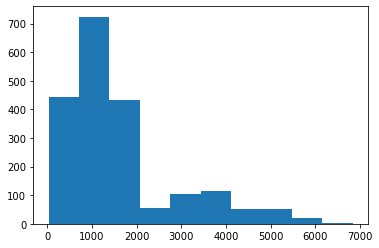

In [15]:
plt.hist(y)

In [16]:
# OLS model and summary.
test_s = sm.OLS(y, x).fit()

print(test_s.summary())

                                 OLS Regression Results                                
Dep. Variable:         loyalty_points   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              7156.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        18:08:28   Log-Likelihood:                         -16552.
No. Observations:                2000   AIC:                                  3.311e+04
Df Residuals:                    1999   BIC:                                  3.311e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [17]:
# Extract the estimated parameters.
print('Parameters: ', test_s.params)  

# Extract the standard errors.
print('Standard errors: ', test_s.bse)  

# Extract the predicted values.
print('Predicted values: ', test_s.predict())  

Parameters:  spending_score    31.88184
dtype: float64
Standard errors:  spending_score    0.376894
dtype: float64
Predicted values:  [1243.39175839 2582.42903666  191.29103975 ... 2901.24743625  510.10943934
  255.05471967]


In [18]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 31.8818 * df['loyalty_points']

# View the output.
y_pred

0         6695.1780
1        16706.0632
2         1275.2720
3        17917.5716
4        11668.7388
           ...     
1995    128515.5358
1996     17184.2902
1997    178984.4252
1998     33412.1264
1999     15271.3822
Name: loyalty_points, Length: 2000, dtype: float64

### 5b) renumeration vs loyalty

In [ ]:
# Define the independent variable.
x2 = df['renumeration'] 

plt.scatter(x2,y)

In [ ]:
# OLS model and summary.
test_renumeration = sm.OLS(y, x2).fit()
print(test_renumeration.summary())

In [ ]:
# Extract the estimated parameters.
print('Parameters: ', test_renumeration.params)  

# Extract the standard errors.
print('Standard errors: ', test_renumeration.bse)  

# Extract the predicted values.
print('Predicted values: ', test_renumeration.predict())  

In [ ]:
# Set the the X coefficient and the constant to generate the regression table.
y2_pred = 33.0781 * df['loyalty_points']

# View the output.
y2_pred

In [ ]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x2, y)

# Plot the regression line (in black).
plt.plot(x2, y2_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [ ]:
# Define the independent variable.
x3 = df['age'] 

plt.scatter(x3,y)

In [ ]:
# OLS model and summary.
test_age = sm.OLS(y, x3).fit()
print(test_age.summary())

In [ ]:
# Extract the estimated parameters.
print('Parameters: ', test_age.params)  

# Extract the standard errors.
print('Standard errors: ', test_age.bse)  

# Extract the predicted values.
print('Predicted values: ', test_age.predict())  

In [ ]:
# Set the X coefficient and the constant to generate the regression table.
y3_pred = 35.3128 * df['loyalty_points']

# View the output.
y3_pred

In [ ]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x3, y)

# Plot the regression line (in black).
plt.plot(x3, y3_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# MLR

In [ ]:
# Import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set.
df_multi = pd.read_csv('reviews_clean.csv')

# View the DataFrame.
df_multi.info()
df_multi.head()

In [ ]:
# Define the dependent variable.
y = df_multi['loyalty_points'] 

# Define the independent variable.
X = df_multi[['renumeration','spending_score','age']] 

In [ ]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

In [ ]:
# Call the predictions for X (array).
multi.predict(X)

In [ ]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

In [ ]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

In [ ]:
print(multi.score(x_train, y_train)*100)

In [ ]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

In [ ]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

In [ ]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)  

In [ ]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

In [ ]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [ ]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

In [ ]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

## 6. Observations and insights

***Your observations here...***






In [ ]:
I worked eight hours on this and did not get anywhere. 

In 5. Linear regression did not give me an intercept value. Is this normal? I looked for this on
the internet and did not find anything. So, I tried using two different exercises from the Week 1
material in canvas, the Plan B version I also double checked on the internet:
    https://www.geeksforgeeks.org/linear-regression-in-python-using-statsmodels/

However. these two fittings gave me two different results but equally useless regression visuals.
What do I do wrong? Overall the correlation is nothing like in the module on Canvas, especially
in the case of the category 'age'. However, when I do an MLR it shows decent results. I really 
not understand this and do not know what to do. I belive I understand the basics of linear
regression and I had no problem following Week 1 until this point. Was this a tricky question?

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as df2.


# View DataFrame.


In [ ]:
# Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Explore the data.


In [ ]:
# Descriptive statistics.


## 2. Plot

In [ ]:
# Create a scatterplot with Seaborn.


In [ ]:
# Create a pairplot with Seaborn.


## 3. Elbow and silhoutte methods

In [ ]:
# Determine the number of clusters: Elbow method.


In [ ]:
# Determine the number of clusters: Silhouette method.


## 4. Evaluate k-means model at different values of *k*

## 5. Fit final model and justify your choice

In [ ]:
# Apply the final model.


In [ ]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

In [ ]:
# Visualising the clusters.


# View the DataFrame.


In [ ]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenisation to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 